In [1]:
# load mudule
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
import os

In [2]:
# which HOME directory
home = os.getenv("HOME")
home

'/Users/nora'

In [3]:
# load data from csv
csv_path = home + '/Pokemon.csv'
data = pd.read_csv(csv_path)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# data column
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# column description

Name : 포켓몬 이름. unique   
Type 1 : 속성. 모든 포켓몬이 기본으로 가진 값  
Type 2 : 속성. 없을 수도 있는 값  
Total : 스탯 총합  
HP : 체력  
Attack : 물리 공격력    
Defense : 물리 공격에 대한 방어력  
Sp. Atk : 특수 공격력    
Sp. Def : 특수 공격에 대한 방어력    
Speed : 선공권을 결정하는 스탯   
Generation : 포켓몬의 세대    
Legendary : boolean값. true or false   


In [6]:
# legendary pokemon
legendary = data[data['Legendary'] == True].reset_index(drop=True)
print(legendary.head())

# normal pokemon
normal = data[data['Legendary'] == False].reset_index(drop=True)
normal.head()

     #                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True  


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
# check NaN
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# another method; check NaN; compare Non-Null Count with RangeIndex
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
# analysis type1, type2
len(set(data['Type 1'])), len(set(data['Type 2']))

(18, 19)

In [10]:
# now we know type2 and type1 is same except for nan value
set(data['Type 2']) - set(data['Type 1'])

{nan}

In [11]:
types = list(set(data['Type 1']))
types

['Dragon',
 'Ground',
 'Ice',
 'Bug',
 'Fairy',
 'Psychic',
 'Dark',
 'Electric',
 'Poison',
 'Flying',
 'Grass',
 'Steel',
 'Rock',
 'Fighting',
 'Fire',
 'Water',
 'Normal',
 'Ghost']

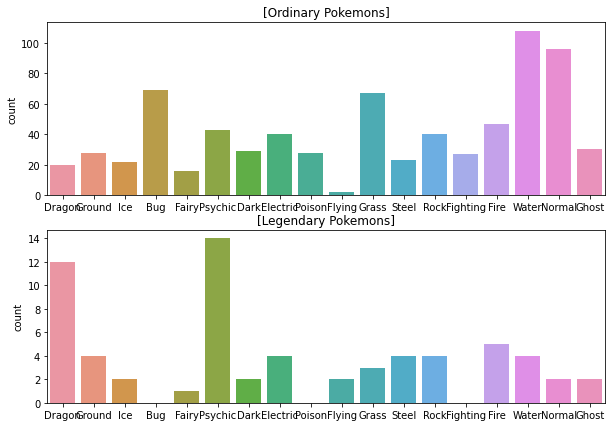

In [31]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=normal, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

<AxesSubplot:xlabel='Type 1', ylabel='count'>

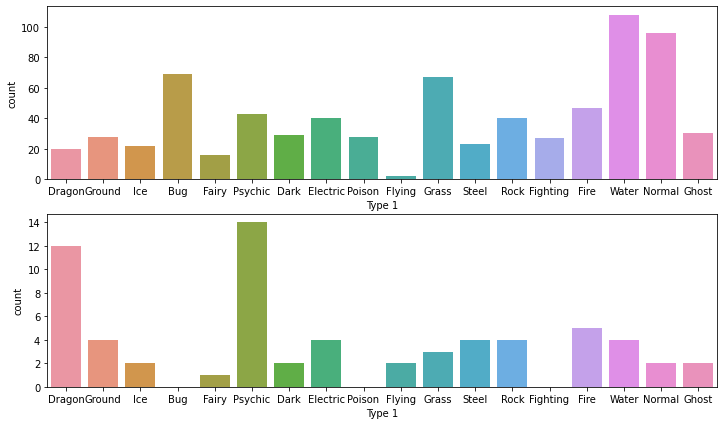

In [13]:
plt.figure(figsize=(12, 7))

plt.subplot(211)
sns.countplot(data=normal, x="Type 1", order=types)

plt.subplot(212)
sns.countplot(data=legendary, x='Type 1', order=types)

In [14]:
# what percent of legendary in data-set
dist_type1 = pd.pivot_table(data, index="Type 1", values="Legendary").sort_values(by="Legendary", ascending=False)
order_dist_type1 = dist_type1.index
dist_type1

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [15]:
# get the type of result
type(pd.pivot_table(data, index="Type 1", values="Legendary").sort_values(by="Legendary", ascending=False))

pandas.core.frame.DataFrame

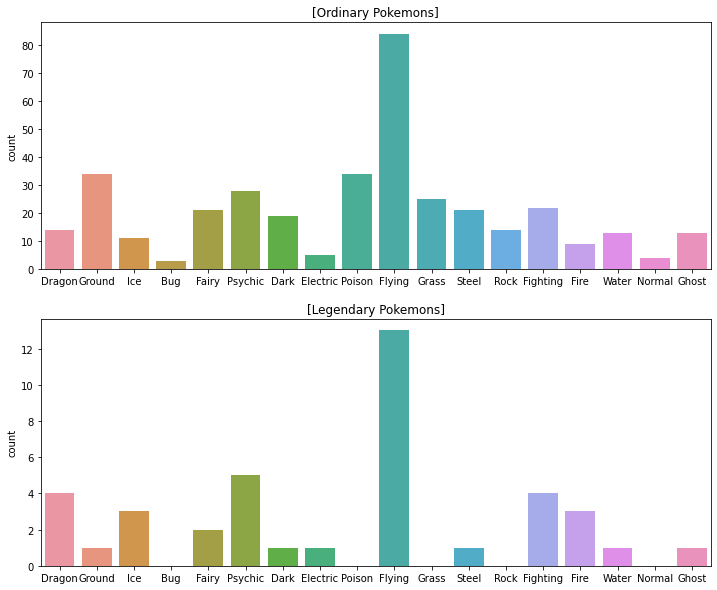

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=normal, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [17]:
whos

Variable           Type         Data/Info
-----------------------------------------
csv_path           str          /Users/nora/Pokemon.csv
data               DataFrame           #                 <...>\n[800 rows x 13 columns]
dist_type1         DataFrame              Legendary\nType<...>0000\nBug        0.000000
home               str          /Users/nora
legendary          DataFrame          #                 N<...>n\n[65 rows x 13 columns]
normal             DataFrame           #                 <...>\n[735 rows x 13 columns]
np                 module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
order_dist_type1   Index        Index(['Flying', 'Dragon'<...>='object', name='Type 1')
os                 module       <module 'os' from '/Users<...>fel/lib/python3.9/os.py'>
pd                 module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt                module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns                modul

In [18]:
dist_type2 = pd.pivot_table(data, index="Type 2", values="Legendary").sort_values(by="Legendary", ascending=False)
dist_type2

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


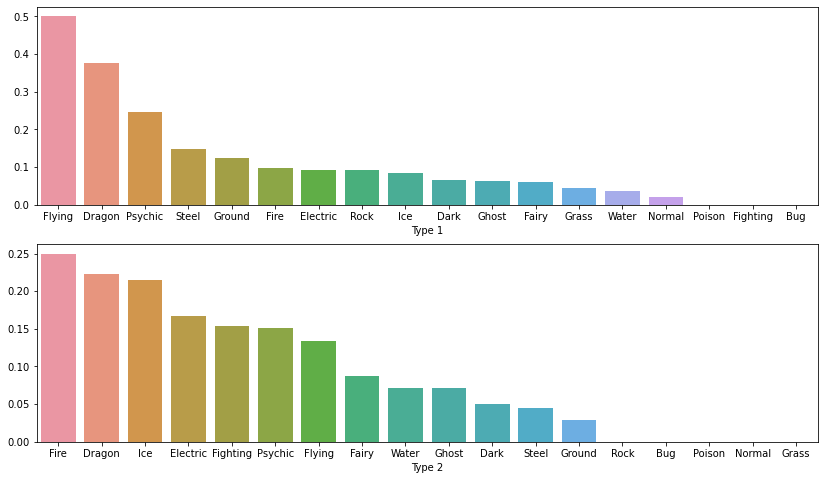

In [19]:
plt.figure(figsize=(14, 8))

plt.subplot(211)
sns.barplot(data=dist_type1.T)

plt.subplot(212)
sns.barplot(data=dist_type2.T)

plt.show()

In [20]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [21]:
# verify total value
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
data[data['Total'] != np.sum(data[stats], axis=1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


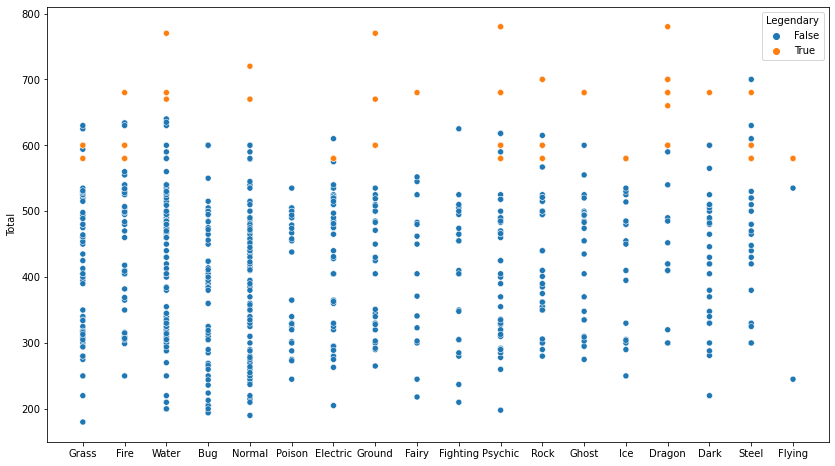

In [22]:
# plot normal and legendary by Total of stats
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

sns.scatterplot(data=data, x='Type 1', y='Total', hue='Legendary').set_xlabel('')
plt.show()

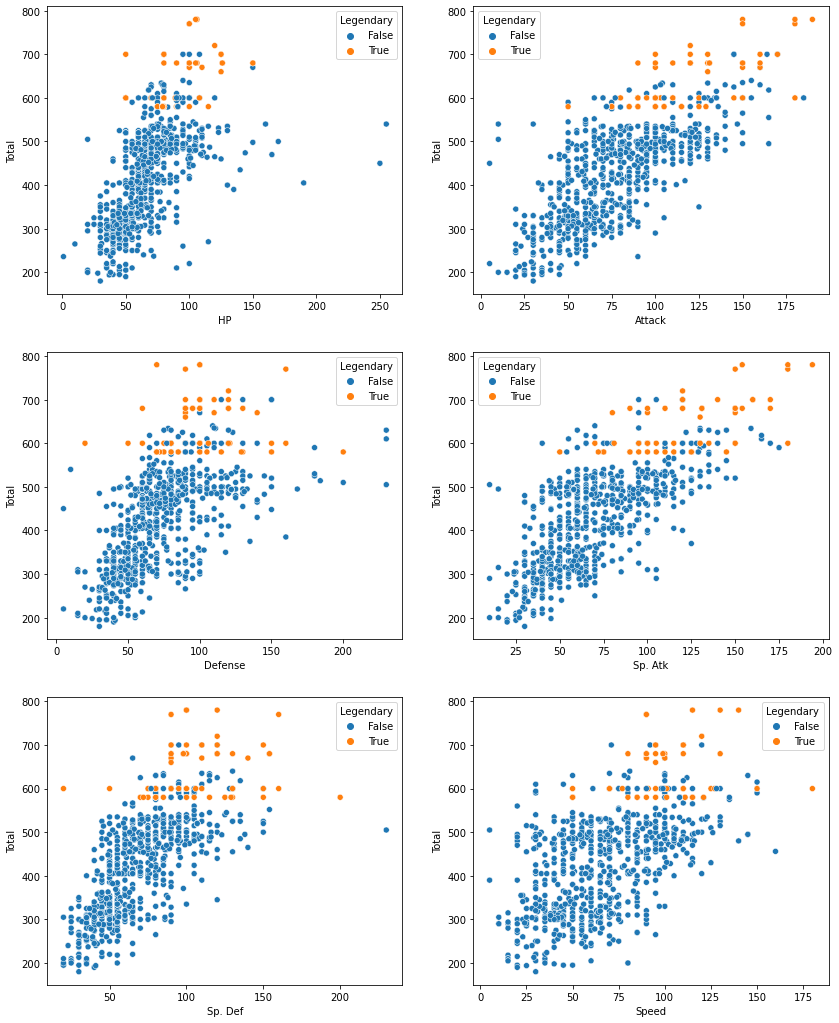

In [23]:
# plot normal and legendary by each stats
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(14, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=data, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=data, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=data, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=data, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=data, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=data, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

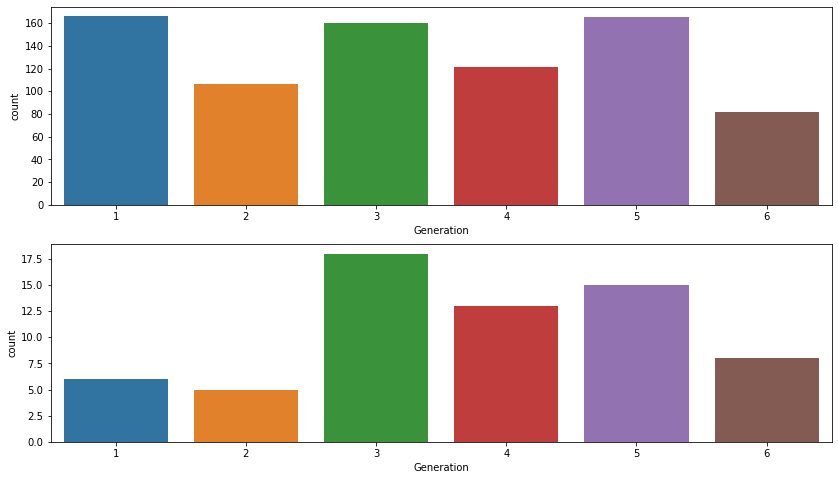

In [24]:
# plot all pokeMon and legendary by Generation
plt.figure(figsize=(14, 8))

plt.subplot(211)
sns.countplot(data=data, x='Generation')

plt.subplot(212)
sns.countplot(data=legendary, x='Generation')

plt.show()

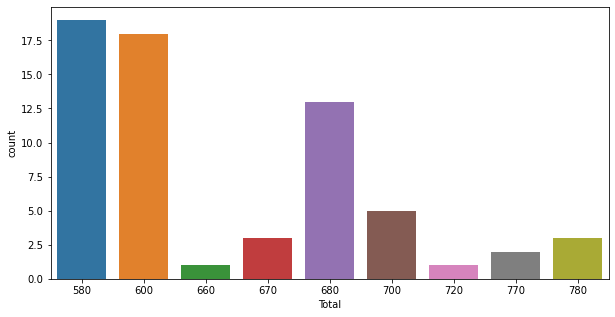

{580, 600, 660, 670, 680, 700, 720, 770, 780}

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

sns.countplot(data=legendary, x='Total')

plt.show()

set(legendary['Total'])

In [26]:
legendary['name_count'] = legendary['Name'].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [27]:
normal['name_count'] = normal['Name'].apply(lambda i: len(i))
normal.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


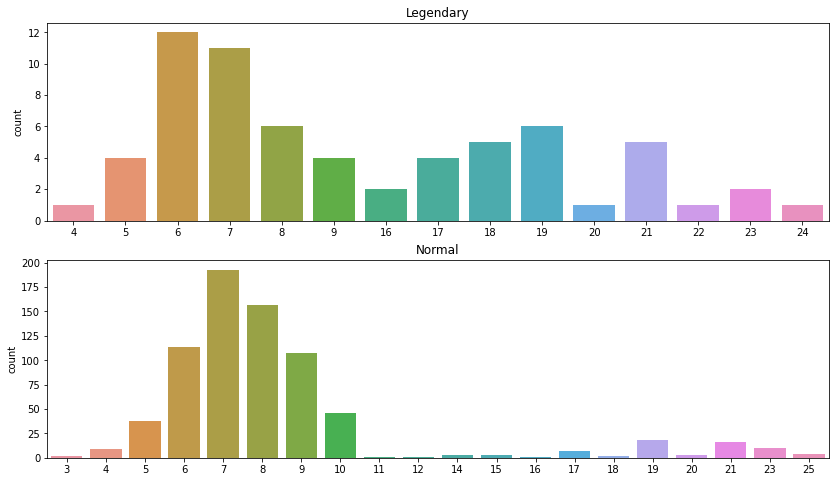

In [28]:
plt.figure(figsize=(14, 8))

plt.subplot(211)
sns.countplot(data=legendary, x='name_count').set_xlabel('')
plt.title('Legendary')

plt.subplot(212)
sns.countplot(data=normal, x='name_count').set_xlabel('')
plt.title('Normal')

plt.show()

In [29]:
print(f'{round(np.sum(legendary["name_count"] > 9) / len(legendary) * 100, 2)}%')
print(f'{round(np.sum(normal["name_count"] > 9) / len(normal) * 100, 2)}%')


41.54%
15.65%
